In [295]:
 # IMPORT STATEMENTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [308]:
#LOAD THE CSV FILE & USE THE COLOUMN'S 0,6,26
df = pd.read_csv('../data/dftRoadSafetyData_Accidents_2018.csv',usecols=[0,6,26],index_col=0,na_values='-1')
df

,Accident_Severity,Road_Surface_Conditions
Accident_Index,,
2018010080971,3,1.0
2018010080973,3,1.0
2018010080974,3,1.0
2018010080981,2,2.0
2018010080982,2,2.0
...,...,...
2018984115718,3,2.0
2018984115918,3,1.0
2018984116018,3,2.0


In [297]:
#Drop the 'na' or missing values
df.dropna(inplace=True)
#print the dataframe
df

,Accident_Severity,Road_Surface_Conditions
Accident_Index,,
2018010080971,3,1.0
2018010080973,3,1.0
2018010080974,3,1.0
2018010080981,2,2.0
2018010080982,2,2.0
...,...,...
2018984115718,3,2.0
2018984115918,3,1.0
2018984116018,3,2.0


In [299]:
#Name the columns, to make it easier to reference later on
df.columns = ['Severe','Surface']
#Set the type as categorical
df['Severe'] = df['Severe'].astype('category')
df['Surface'] = df['Surface'].astype('category')
#print the type
df.dtypes

Severe     category
Surface    category
dtype: object

In [300]:
#rename the road surface and severity categories using the legend in the dataset as they were both labelled with integers. 
s_group = ['Dry', 
           'Wet or damp', 
           'Snow',
           'Frost or ice',
           'Flood over 3cm. deep'
          ]
#cat.rename_categories to rename categories
df['Severe'] = df['Severe'].cat.rename_categories(['Fatal', 'Serious', 'Slight'])
df['Surface'] = df['Surface'].cat.rename_categories(s_group)
df

,Severe,Surface
Accident_Index,,
2018010080971,Slight,Dry
2018010080973,Slight,Dry
2018010080974,Slight,Dry
2018010080981,Serious,Wet or damp
2018010080982,Serious,Wet or damp
...,...,...
2018984115718,Slight,Wet or damp
2018984115918,Slight,Dry
2018984116018,Slight,Wet or damp


In [301]:
#Set the Accident severity category as ordinal and set the order
sev = {
    'Fatal',
    'Serious',
    'Slight',
}
df['Severe'] = df['Severe'].astype(
    pd.CategoricalDtype(ordered=True, 
                        categories=sev))
df

,Severe,Surface
Accident_Index,,
2018010080971,Slight,Dry
2018010080973,Slight,Dry
2018010080974,Slight,Dry
2018010080981,Serious,Wet or damp
2018010080982,Serious,Wet or damp
...,...,...
2018984115718,Slight,Wet or damp
2018984115918,Slight,Dry
2018984116018,Slight,Wet or damp


In [302]:
#Count the total number categories
counts = df['Surface'].value_counts()
counts

Dry                     90546
Wet or damp             28215
Frost or ice             1417
Snow                     1099
Flood over 3cm. deep      135
Name: Surface, dtype: int64

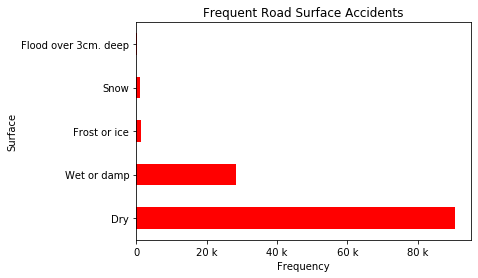

In [307]:
#Visualise the frequent road surface accidents by plotting a barchart of the above counts
ax = counts.plot.barh(color='r')
ax.set_title('Frequent Road Surface Accidents') 
ax.set_ylabel('Surface')
ax.set_xlabel('Frequency')
ax.xaxis.set_major_formatter(
mpl.ticker.EngFormatter(places=0))
plt.savefig("Road-Surface.png", dpi=300, bbox_inches='tight')
plt.show()

In [305]:
#Make a table crosstabulating the road surface and severity of accidents, normalize=ing by index and multiplying by 100
pc = pd.crosstab(df['Surface'], df['Severe'], normalize='index')
pc.drop('Serious', axis='columns', inplace=True)
pc.drop('Slight', axis='columns', inplace=True)
pc = pc * 100
pc = pc.sort_values(by='Fatal', ascending=False)
pc

Severe,Fatal
Surface,
Wet or damp,1.601985
Flood over 3cm. deep,1.481481
Dry,1.323084
Frost or ice,0.846860
Snow,0.636943


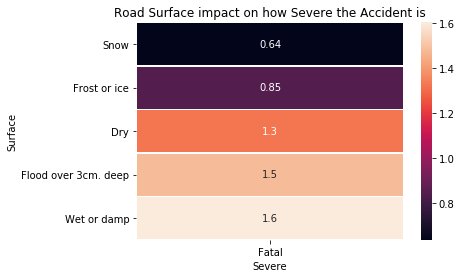

In [284]:
#Attempt to do a heatmap
ax = sns.heatmap(pc, annot=True,linewidths=.5) 
ax.invert_yaxis()
#ax.set_ylim(0, 5) # Needed for bug in mpl 3.1.1. 
ax.set_title("Road Surface impact on how Severe the Accident is")
plt.savefig("Road-Surface-Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

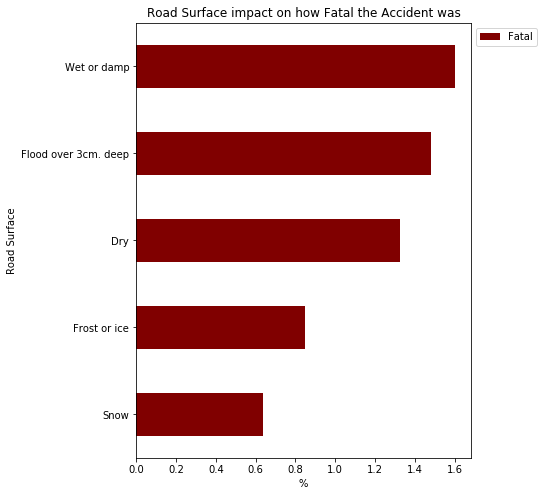

In [306]:
#Make a bar chart visualizing the 'pc' table above 
ax = pc.plot.barh(figsize=(6,8), color='maroon')
ax.invert_yaxis()
ax.set_title("Road Surface impact on how Fatal the Accident was")
ax.set_ylabel('Road Surface')
ax.set_xlabel('%')
handles, labels = ax.get_legend_handles_labels()
ax.legend((handles), (labels),
bbox_to_anchor=(1.0, 1.0),)
plt.savefig("Road&Severity.png", dpi=300, bbox_inches='tight')